In [1]:
import numpy as np
from utils import *
import itertools
import random
from numpy import linalg as LA
import math
import matplotlib as mpl

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

In [2]:
folder_name = "../Toroidal_topology_grid_cell_data/"

In [3]:
rat_name = 'R'
mod_name = '2'
sess_name = 'OF'
day_name = 'day1'

In [4]:
tens = [10,20,30,40,50,60,70,80,90,100,110,120,130,140]
alpha_all = np.zeros((len(tens), 100))

rat_name = 'R'
mod_name = '2'
sess_name = 'OF'
day_name = 'day1'

sspikes_all, xx, yy = get_spikes(rat_name, mod_name, day_name, sess_name, bType = 'pure',
                                 bSmooth = True, bSpeed = True, folder = folder_name)[:3]
spikes_all = get_spikes(rat_name, mod_name, day_name, sess_name, bType = 'pure', bSmooth = False, bSpeed = True, folder = folder_name)[0]


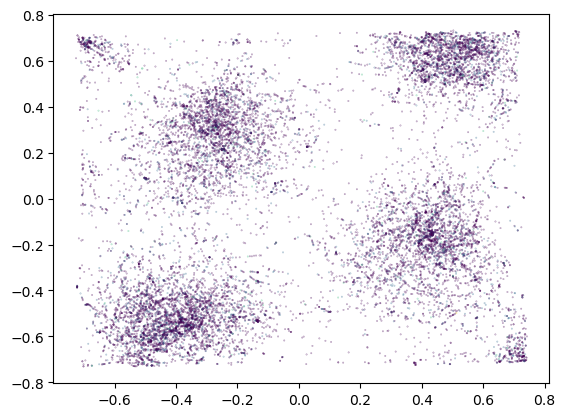

In [5]:
k = 17

indices = spikes_all[:,k] > 0
plt.scatter(xx[indices], yy[indices], s=0.1, c=spikes_all[indices,k], alpha=0.5)
plt.show()

A mouse moves in a time series: 

$$f : \mathbb R \rightarrow \mathbb R, \mathbb R, \mathbb R^{149}$$
$$t \rightarrow x, y, spikes$$

Assumption: this curve $f$ is space filling in $[-0.75, 0.75]^2$. We can transform: 

$$f \rightarrow g : \mathbb R^2 \rightarrow \mathbb R^{149}$$

We want to learn a function $h$ such that 

$$h : \mathbb R^{149} \rightarrow \{ \text{what is the mouse doing} \} $$

In [6]:
min_x = min(xx)
max_x = max(xx)

min_y = min(yy)
max_y = max(yy)

X = create_vector(min_x, max_x, 0.01)
Y = create_vector(min_y, max_y, 0.01)

X_,Y_ = np.meshgrid(X,Y)

Z = np.zeros(X_.shape)
for t in range(766731):
    if spikes_all[t,k] > 0: 
        for i, x_new in enumerate(X):
            for j, y_new in enumerate(Y):
                Z[i][j] += spikes_all[t,k] * np.exp(-20 * np.sqrt((xx[t] - x_new) ** 2 + (yy[t] - y_new) ** 2) ) / np.sqrt(2 * math.pi)

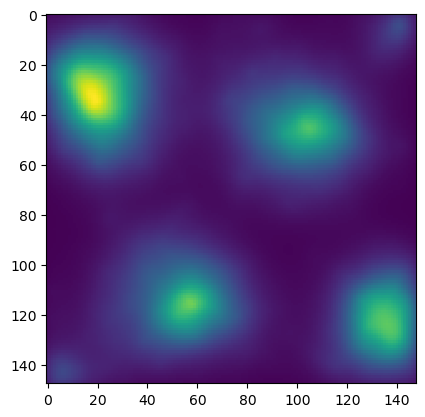

In [7]:
plt.imshow(Z, cmap='viridis', interpolation='nearest')
plt.show()

<IPython.core.display.Javascript object>


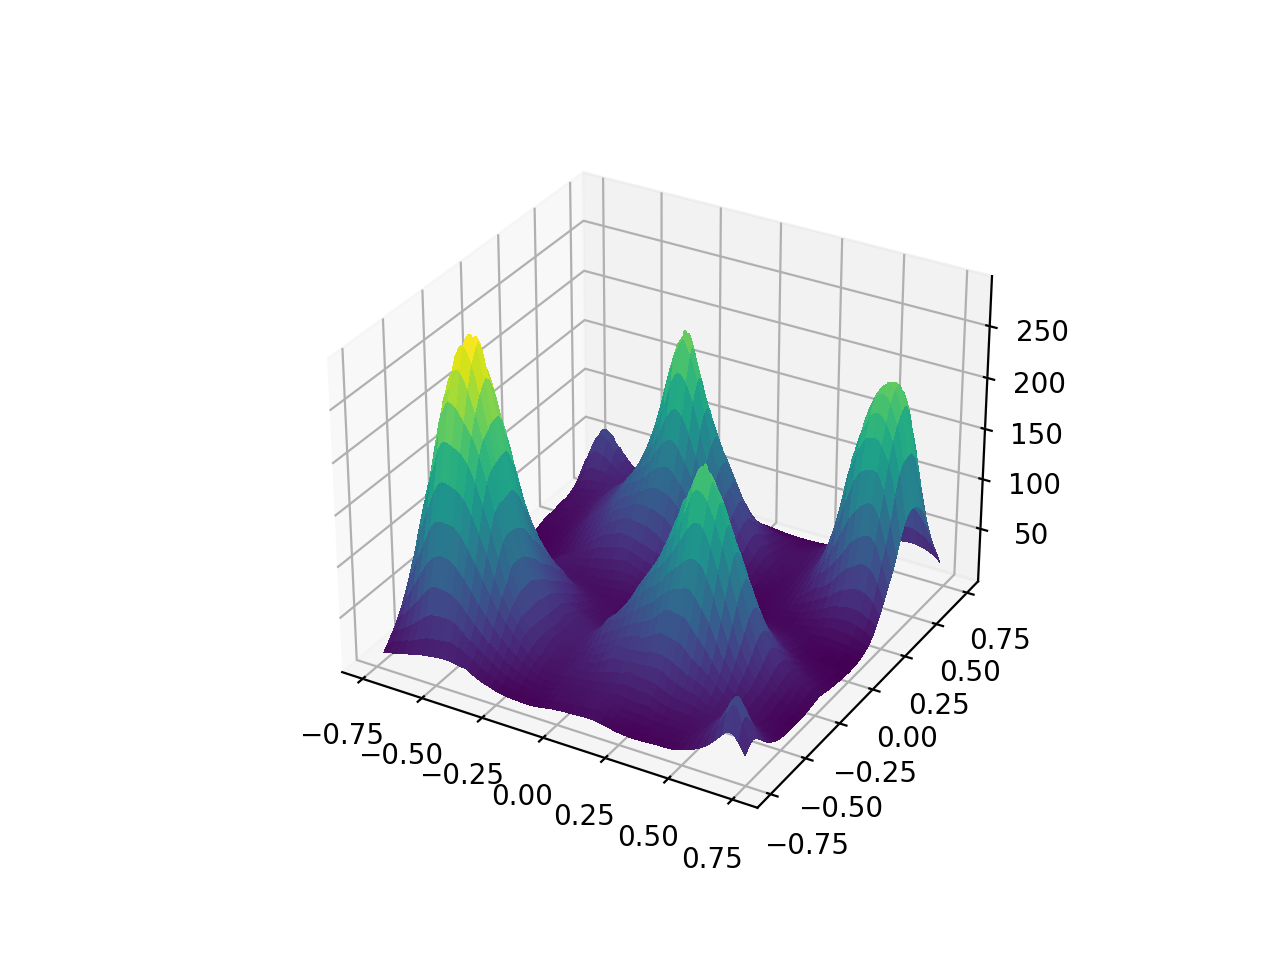

In [8]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X_, Y_, Z, cmap=mpl.colormaps['viridis'], linewidth=0, antialiased=False)